In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## import the datset

In [16]:

data = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv", encoding='latin1')


In [17]:
data.head(10)

,ÿFILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [18]:
data.shape

(235795, 56)

## checking for null / missing values


In [19]:
data.isnull().sum()

ÿFILENAME                     0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ÿFILENAME                   235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

## removing unneccessary features

In [21]:
data = data.drop('URLLength', axis=1)


In [22]:
data = data.drop('DomainLength', axis=1)

In [23]:
data=data.drop(['IsDomainIP', 'TLDLength','NoOfSubDomain','HasObfuscation','NoOfObfuscatedChar','ObfuscationRatio','NoOfLettersInURL','LetterRatioInURL','NoOfDegitsInURL','DegitRatioInURL','NoOfEqualsInURL','NoOfQMarkInURL','NoOfAmpersandInURL','NoOfOtherSpecialCharsInURL','SpacialCharRatioInURL','NoOfURLRedirect','NoOfSelfRedirect','NoOfPopup','NoOfiFrame','HasExternalFormSubmit','NoOfImage','NoOfCSS','NoOfJS','NoOfSelfRef','NoOfEmptyRef','HasCopyrightInfo'], axis=1)

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ÿFILENAME              235795 non-null  object 
 1   URL                    235795 non-null  object 
 2   Domain                 235795 non-null  object 
 3   TLD                    235795 non-null  object 
 4   URLSimilarityIndex     235795 non-null  float64
 5   CharContinuationRate   235795 non-null  float64
 6   TLDLegitimateProb      235795 non-null  float64
 7   URLCharProb            235795 non-null  float64
 8   IsHTTPS                235795 non-null  int64  
 9   LineOfCode             235795 non-null  int64  
 10  LargestLineLength      235795 non-null  int64  
 11  HasTitle               235795 non-null  int64  
 12  Title                  235795 non-null  object 
 13  DomainTitleMatchScore  235795 non-null  float64
 14  URLTitleMatchScore     235795 non-nu

In [25]:
data.head(10)

,ÿFILENAME,URL,Domain,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,IsHTTPS,LineOfCode,...,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,100.0,1.000000,0.522907,0.061933,1,558,...,0,0,1,1,0,1,0,0,124,1
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,100.0,0.666667,0.032650,0.050207,1,618,...,0,1,1,0,0,0,0,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,100.0,0.866667,0.028555,0.064129,1,467,...,1,0,1,1,0,0,0,0,5,1
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,100.0,1.000000,0.522907,0.057606,1,6356,...,0,1,1,1,0,0,1,1,31,1
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,100.0,1.000000,0.079963,0.059441,1,6089,...,1,1,1,1,0,1,1,0,85,1
5,23107.txt,https://www.globalreporting.org,www.globalreporting.org,org,100.0,1.000000,0.079963,0.060614,1,1210,...,1,1,0,1,0,0,0,0,14,1
6,23034.txt,https://www.saffronart.com,www.saffronart.com,com,100.0,1.000000,0.522907,0.063549,1,1024,...,0,1,0,1,0,0,0,0,17,1
7,696732.txt,https://www.nerdscandy.com,www.nerdscandy.com,com,100.0,1.000000,0.522907,0.060486,1,514,...,1,1,1,0,0,0,0,0,15,1
8,739255.txt,https://www.hyderabadonline.in,www.hyderabadonline.in,in,100.0,1.000000,0.005084,0.056980,1,2371,...,1,1,1,1,1,0,0,0,317,1
9,14486.txt,https://www.aap.org,www.aap.org,org,100.0,1.000000,0.079963,0.070497,1,2730,...,1,1,0,0,0,0,0,0,65,1


## Checking for outliers and treating them

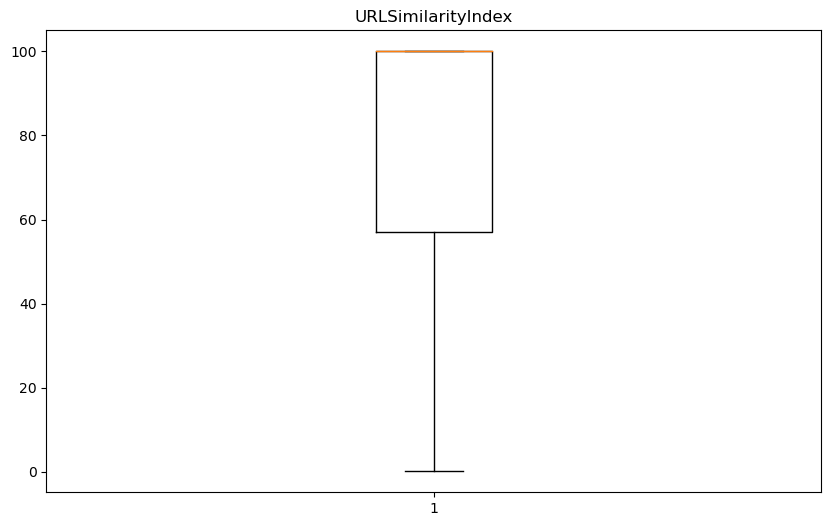

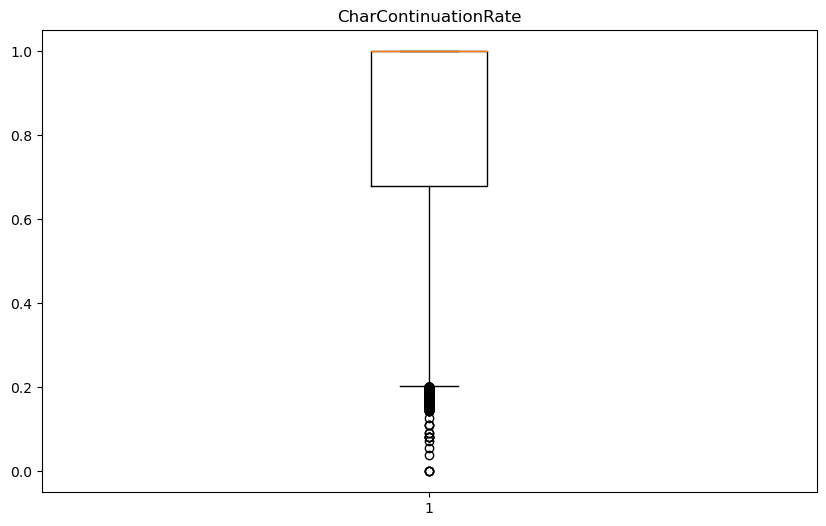

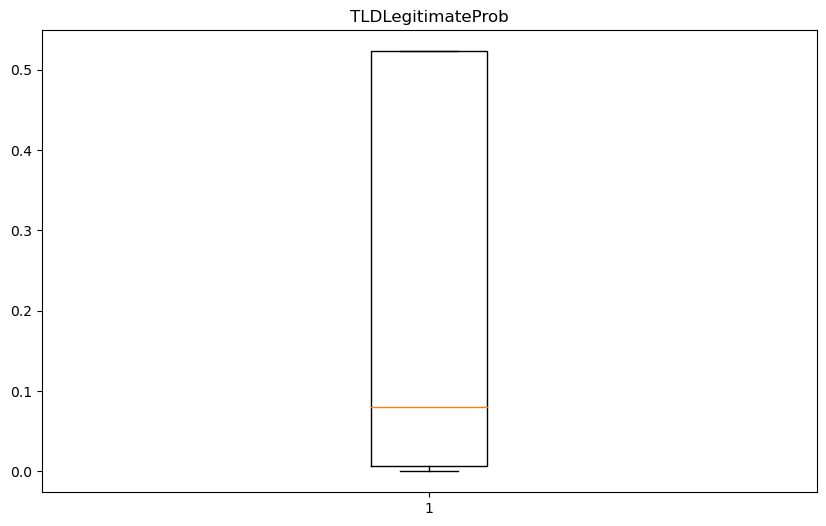

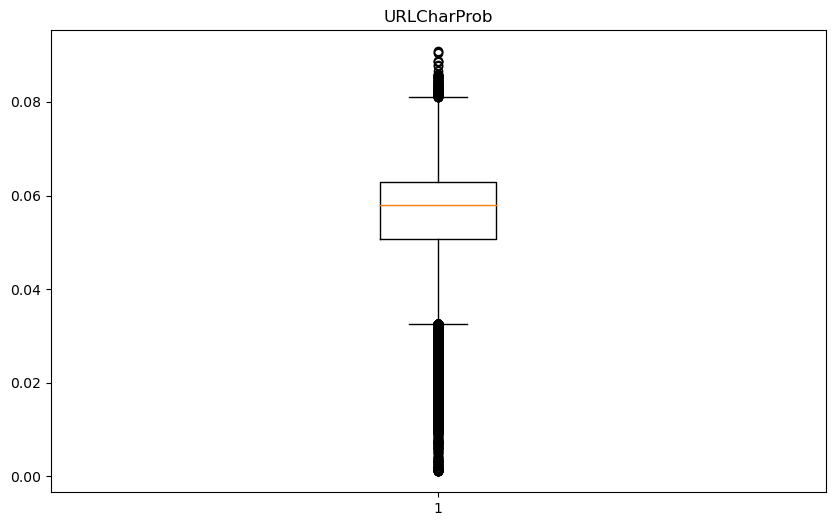

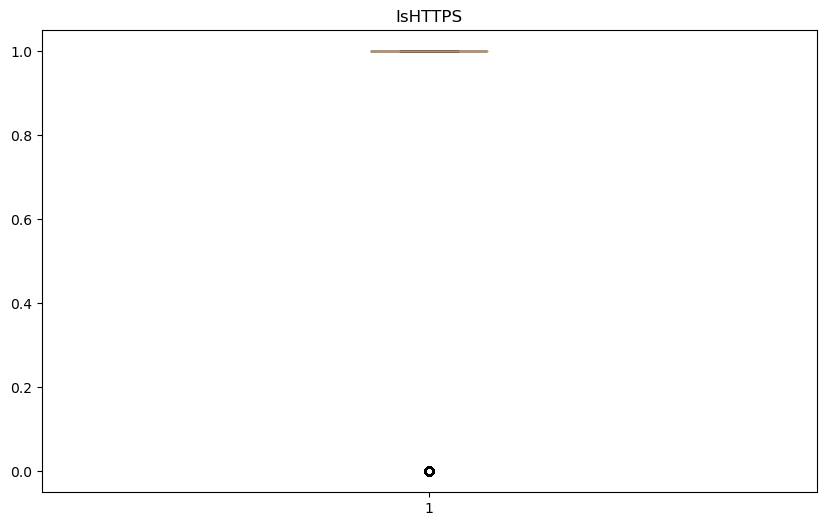

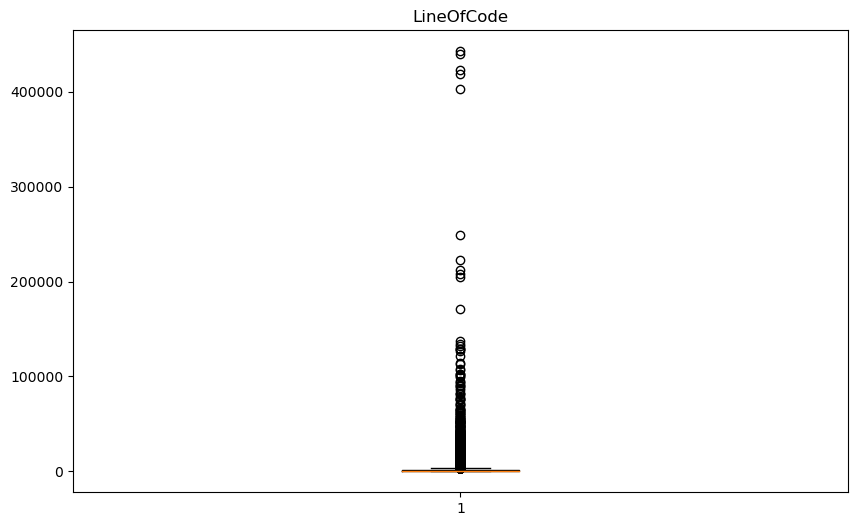

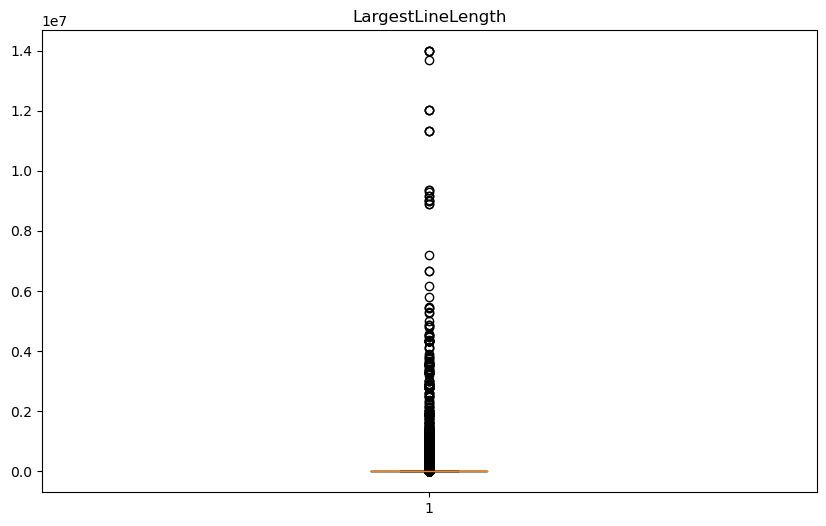

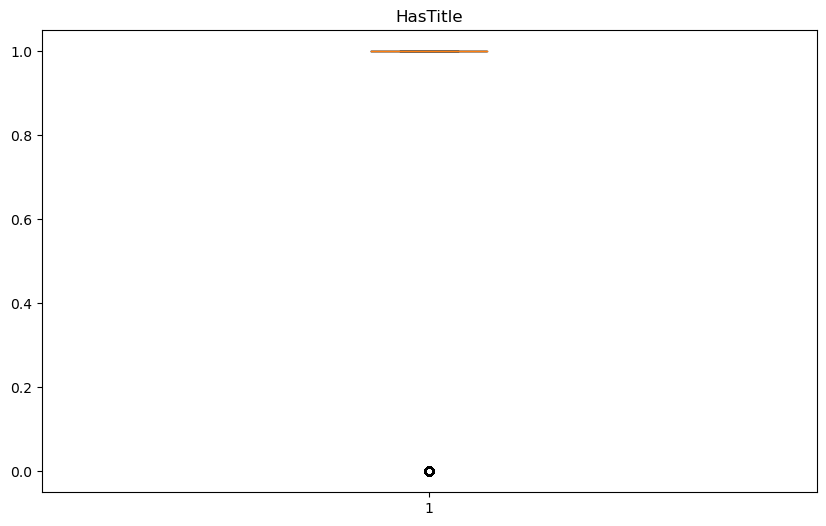

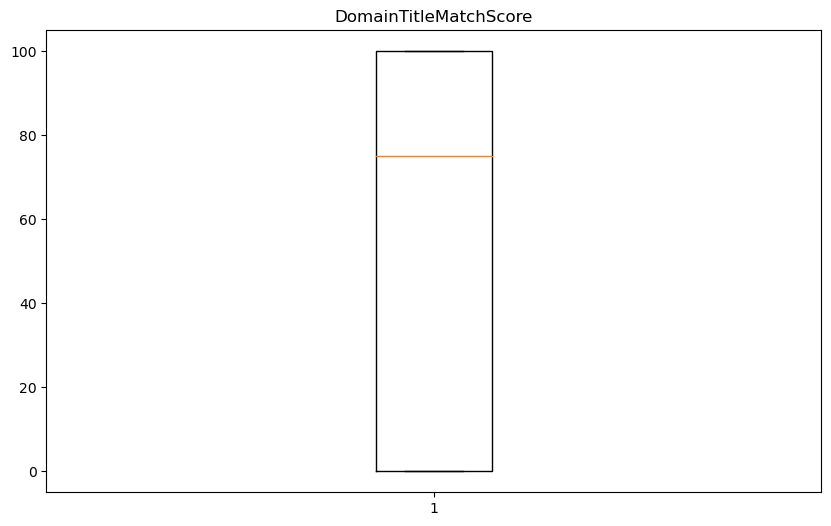

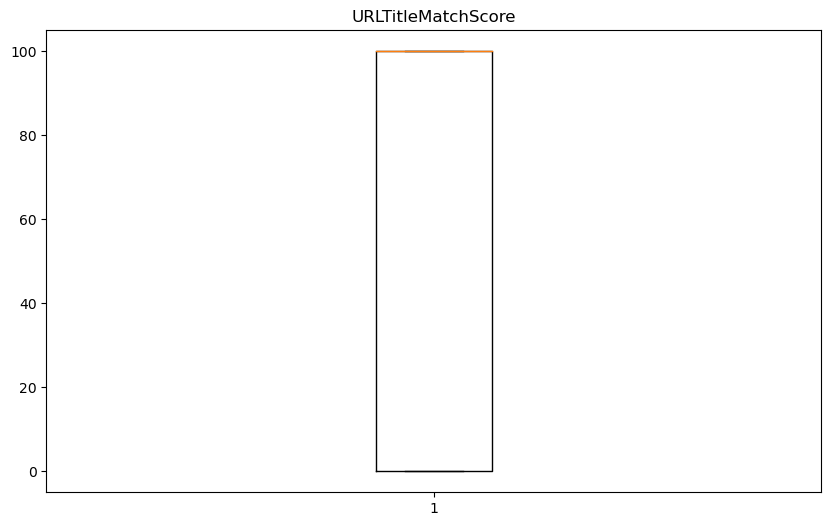

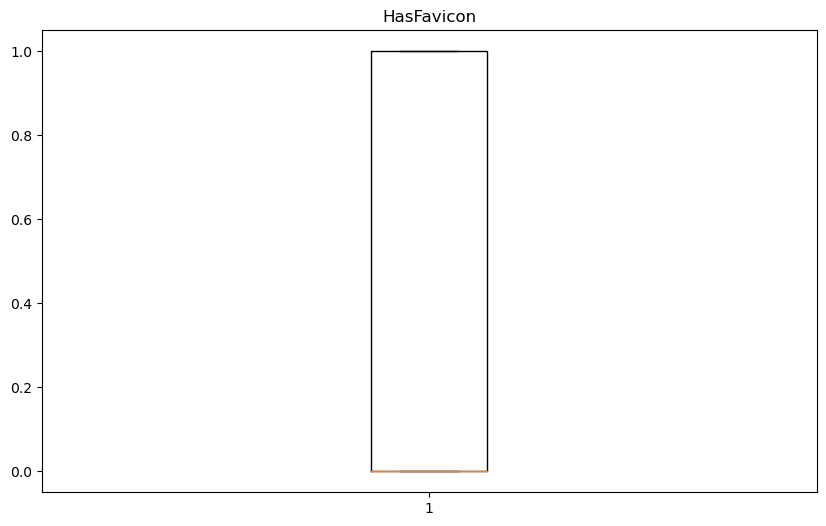

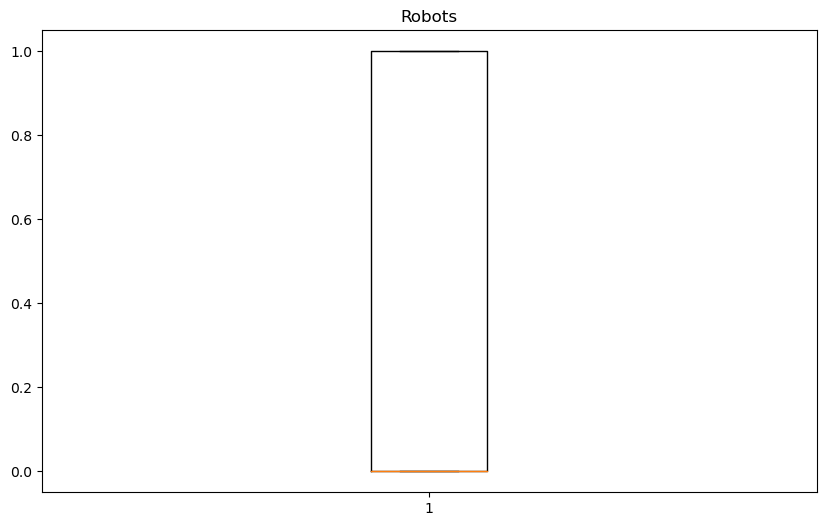

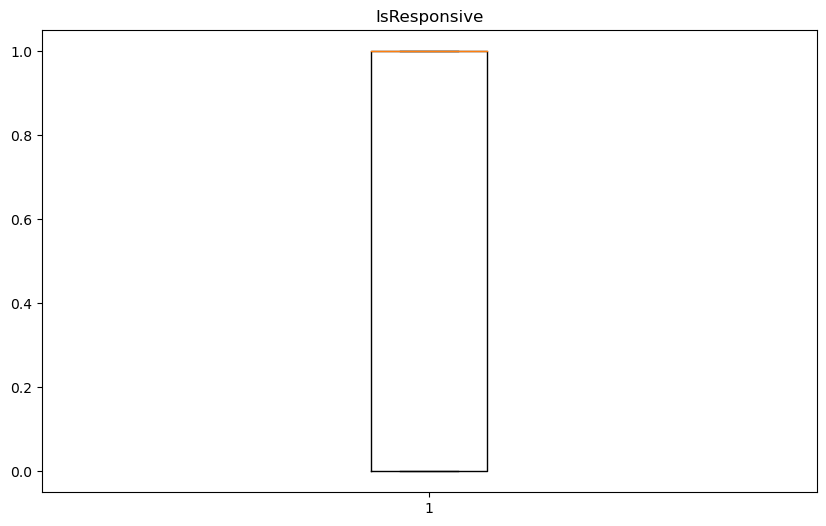

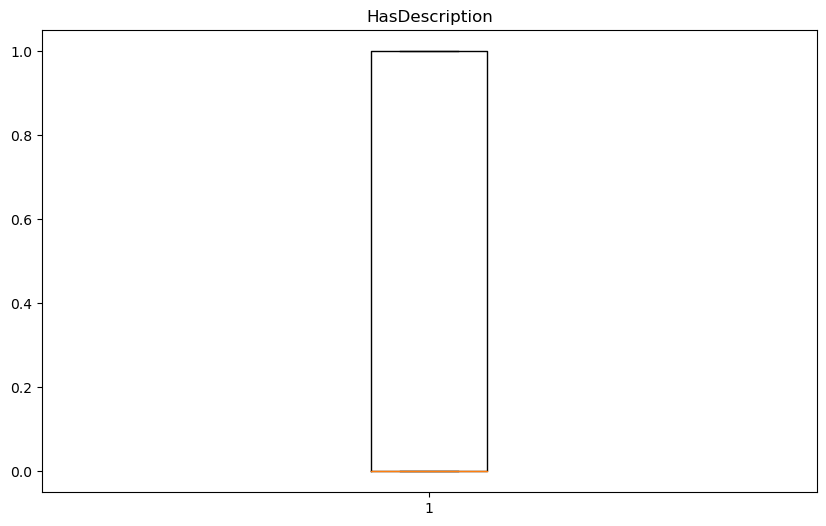

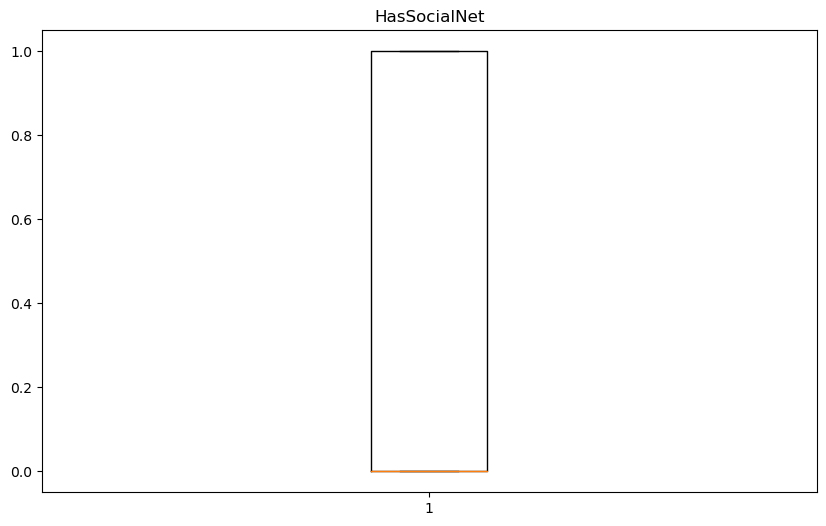

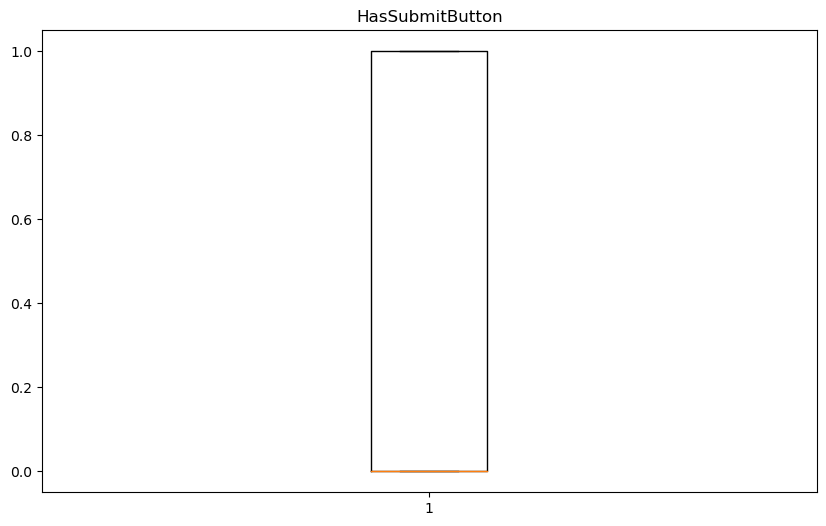

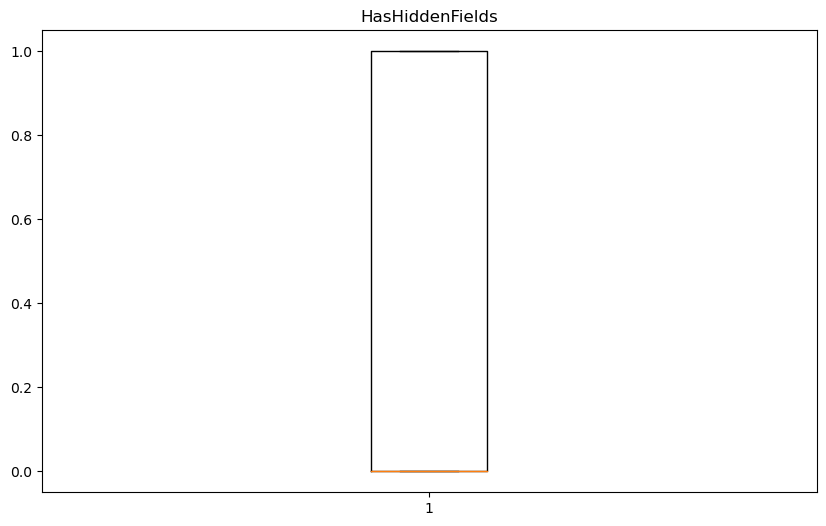

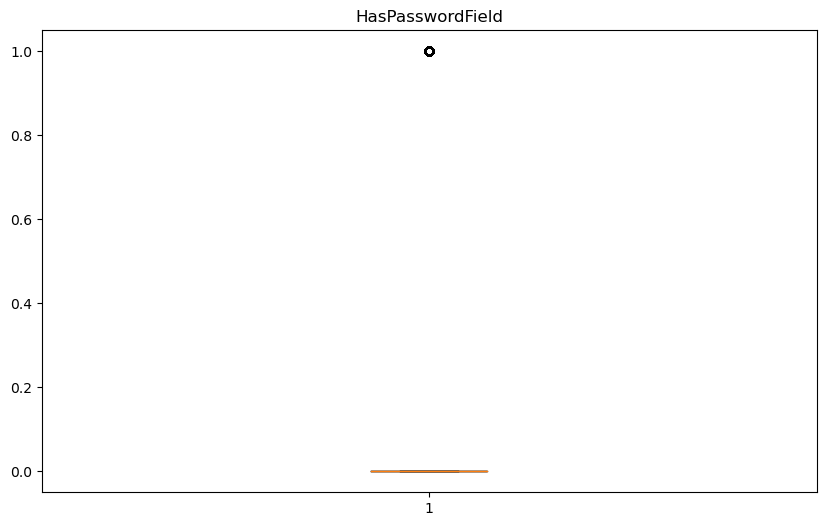

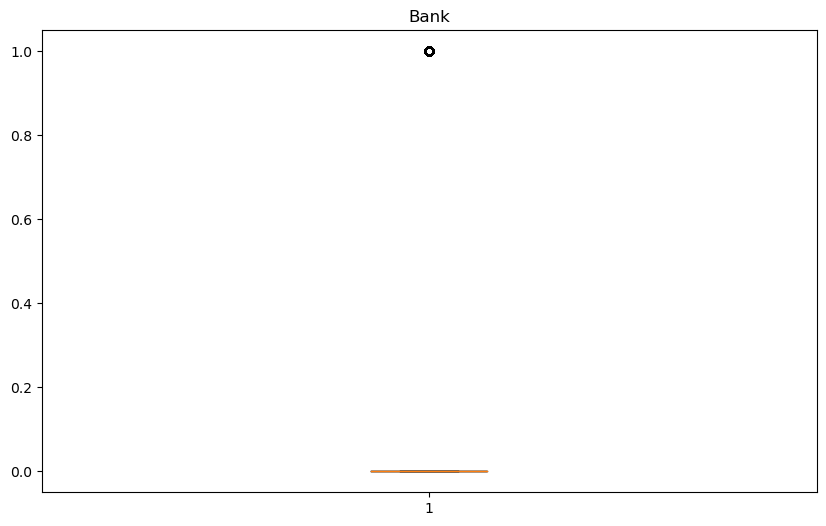

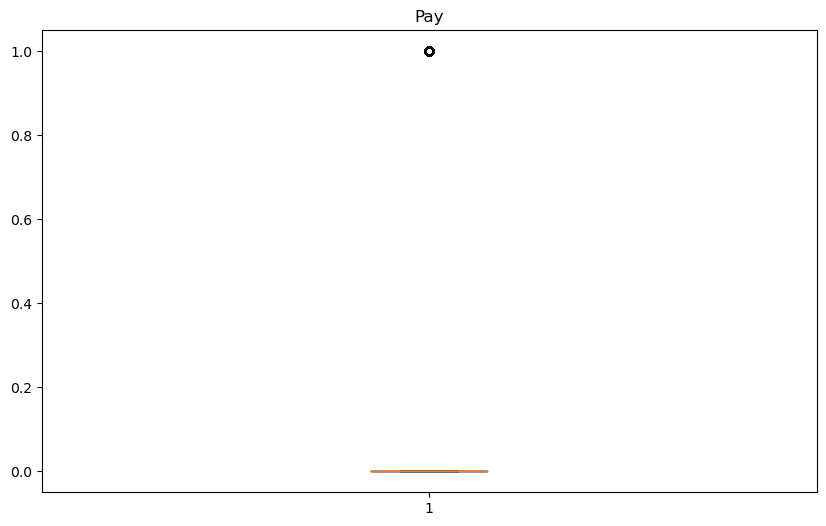

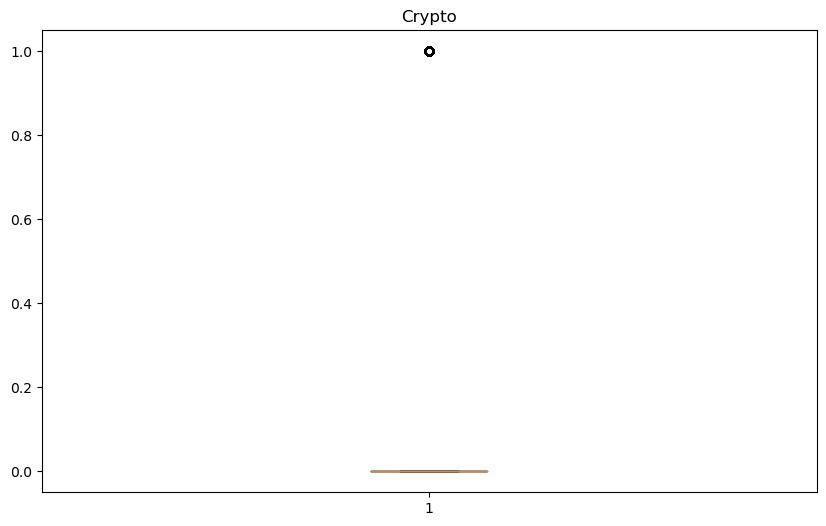

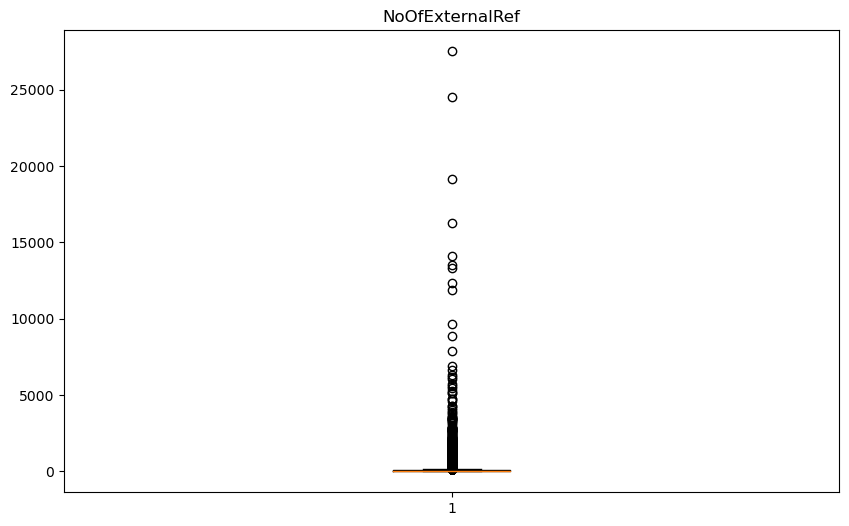

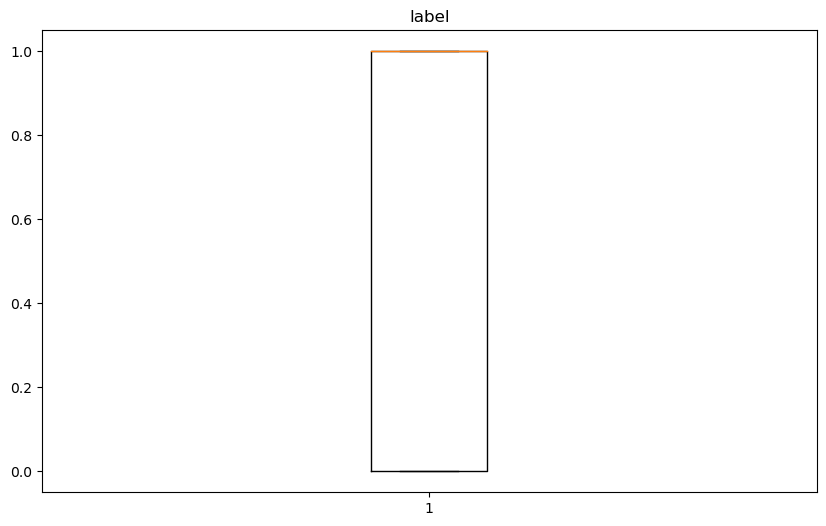

In [26]:
numeric_columns = [col for col in data.columns if data[col].dtype in [np.float64, np.int64]]


for col in numeric_columns:

    Q1 = data[col].quantile(0.25)

    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR

    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)].index

    

    # Plot boxplot for the current column

    plt.figure(figsize=(10,6))

    plt.boxplot(data[col])

    plt.title(col)

    plt.show()

    

    # Print the outliers for the current column

    

        

In [27]:
#outliers in URLChatProb
#sns.distplot(data.URLCharProb)

In [28]:
Q1= data.URLCharProb.quantile(0.25)
Q3= data.URLCharProb.quantile(0.75)
Q1,Q3

(0.050747225, 0.0628754855)

In [29]:
IQR=Q3-Q1
IQR


0.012128260499999995

In [30]:
min_boundary= Q1 - 1.5 * IQR
max_boundary= Q3 + 1.5 * IQR

print("min:",min_boundary,"\nmax:",max_boundary)

min: 0.03255483425000001 
max: 0.08106787624999999


In [31]:
def cap_URLCharProb(x):
    if x > max_boundary:
        x= max_boundary 
    elif x < min_boundary:
        x= min_boundary
    else:
        x= x
    return x 


data.URLCharProb=data.URLCharProb.apply(cap_URLCharProb)

<Axes: >

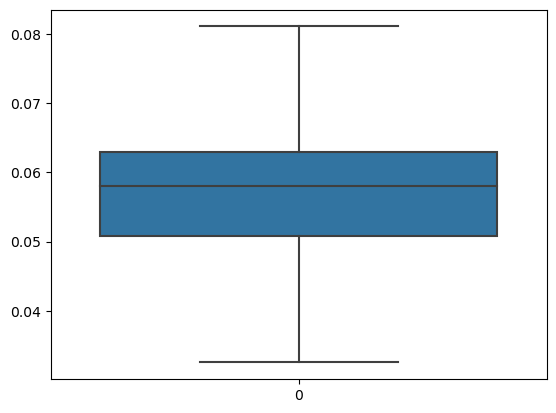

In [32]:
sns.boxplot(data.URLCharProb)

## Heatmap for correlation and dropping any correlated features

In [33]:
'''sns.heatmap(data.corr(), annot=True, fmt= '.2f')
plt.figure(figsize=(100, 100))
plt.show()'''

"sns.heatmap(data.corr(), annot=True, fmt= '.2f')\nplt.figure(figsize=(100, 100))\nplt.show()"

In [34]:
#print(data.corr())

In [35]:
data=data.drop(['DomainTitleMatchScore'], axis=1)

In [36]:
data.head(5)


,ÿFILENAME,URL,Domain,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,IsHTTPS,LineOfCode,...,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,100.0,1.000000,0.522907,0.061933,1,558,...,0,0,1,1,0,1,0,0,124,1
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,100.0,0.666667,0.032650,0.050207,1,618,...,0,1,1,0,0,0,0,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,100.0,0.866667,0.028555,0.064129,1,467,...,1,0,1,1,0,0,0,0,5,1
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,100.0,1.000000,0.522907,0.057606,1,6356,...,0,1,1,1,0,0,1,1,31,1
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,100.0,1.000000,0.079963,0.059441,1,6089,...,1,1,1,1,0,1,1,0,85,1


In [37]:
data['URL'].value_counts()

https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
https://www.toucansolution.com                                                                1
https://www.tirnavos.gr                                                                       1
https://www.lovehappyhour.com                                                                 1
https://www.alternativefinland.com      

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ÿFILENAME             235795 non-null  object 
 1   URL                   235795 non-null  object 
 2   Domain                235795 non-null  object 
 3   TLD                   235795 non-null  object 
 4   URLSimilarityIndex    235795 non-null  float64
 5   CharContinuationRate  235795 non-null  float64
 6   TLDLegitimateProb     235795 non-null  float64
 7   URLCharProb           235795 non-null  float64
 8   IsHTTPS               235795 non-null  int64  
 9   LineOfCode            235795 non-null  int64  
 10  LargestLineLength     235795 non-null  int64  
 11  HasTitle              235795 non-null  int64  
 12  Title                 235795 non-null  object 
 13  URLTitleMatchScore    235795 non-null  float64
 14  HasFavicon            235795 non-null  int64  
 15  

<Axes: ylabel='count'>

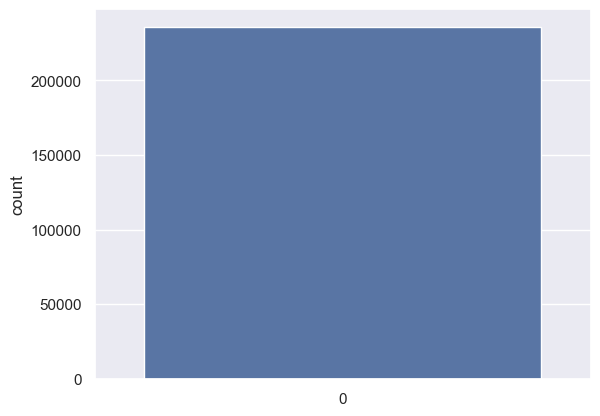

In [39]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['ÿFILENAME'] = le.fit_transform(data['ÿFILENAME'])
sns.set(style ="darkgrid")
sns.countplot(data['ÿFILENAME'])


## Using encoding techniques to modify categorical data

In [40]:
data['ÿFILENAME']


0          62810
1          30568
2          79880
3          69962
4          11694
           ...  
235790     93848
235791    113036
235792     85824
235793    108327
235794     33318
Name: ÿFILENAME, Length: 235795, dtype: int32

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ÿFILENAME             235795 non-null  int32  
 1   URL                   235795 non-null  object 
 2   Domain                235795 non-null  object 
 3   TLD                   235795 non-null  object 
 4   URLSimilarityIndex    235795 non-null  float64
 5   CharContinuationRate  235795 non-null  float64
 6   TLDLegitimateProb     235795 non-null  float64
 7   URLCharProb           235795 non-null  float64
 8   IsHTTPS               235795 non-null  int64  
 9   LineOfCode            235795 non-null  int64  
 10  LargestLineLength     235795 non-null  int64  
 11  HasTitle              235795 non-null  int64  
 12  Title                 235795 non-null  object 
 13  URLTitleMatchScore    235795 non-null  float64
 14  HasFavicon            235795 non-null  int64  
 15  

In [42]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['URL'] = le.fit_transform(data['URL'])
data['Domain'] = le.fit_transform(data['Domain'])
data['URL'] = le.fit_transform(data['URL'])
data['TLD'] = le.fit_transform(data['TLD'])
data['Title'] = le.fit_transform(data['Title'])



In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ÿFILENAME             235795 non-null  int32  
 1   URL                   235795 non-null  int64  
 2   Domain                235795 non-null  int32  
 3   TLD                   235795 non-null  int32  
 4   URLSimilarityIndex    235795 non-null  float64
 5   CharContinuationRate  235795 non-null  float64
 6   TLDLegitimateProb     235795 non-null  float64
 7   URLCharProb           235795 non-null  float64
 8   IsHTTPS               235795 non-null  int64  
 9   LineOfCode            235795 non-null  int64  
 10  LargestLineLength     235795 non-null  int64  
 11  HasTitle              235795 non-null  int64  
 12  Title                 235795 non-null  int32  
 13  URLTitleMatchScore    235795 non-null  float64
 14  HasFavicon            235795 non-null  int64  
 15  

In [44]:
data.head(10)

,ÿFILENAME,URL,Domain,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,IsHTTPS,LineOfCode,...,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfExternalRef,label
0,62810,209013,187114,231,100.0,1.000000,0.522907,0.061933,1,558,...,0,0,1,1,0,1,0,0,124,1
1,30568,223747,204805,254,100.0,0.666667,0.032650,0.050207,1,618,...,0,1,1,0,0,0,0,0,217,1
2,79880,227579,209611,647,100.0,0.866667,0.028555,0.064129,1,467,...,1,0,1,1,0,0,0,0,5,1
3,69962,205082,182115,231,100.0,1.000000,0.522907,0.057606,1,6356,...,0,1,1,1,0,0,1,1,31,1
4,11694,198761,173664,503,100.0,1.000000,0.079963,0.059441,1,6089,...,1,1,1,1,0,1,1,0,85,1
5,22398,146024,107600,503,100.0,1.000000,0.079963,0.060614,1,1210,...,1,1,0,1,0,0,0,0,14,1
6,22219,201621,177115,231,100.0,1.000000,0.522907,0.063549,1,1024,...,0,1,0,1,0,0,0,0,17,1
7,97724,181341,151627,231,100.0,1.000000,0.522907,0.060486,1,514,...,1,1,1,0,0,0,0,0,15,1
8,106043,153299,116740,368,100.0,1.000000,0.005084,0.056980,1,2371,...,1,1,1,1,1,0,0,0,317,1
9,10029,97961,46722,503,100.0,1.000000,0.079963,0.070497,1,2730,...,1,1,0,0,0,0,0,0,65,1


## Splitting data into train and test

In [45]:
X=data.drop('label',axis=1)
X.head(5)

,ÿFILENAME,URL,Domain,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,IsHTTPS,LineOfCode,...,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfExternalRef
0,62810,209013,187114,231,100.0,1.000000,0.522907,0.061933,1,558,...,1,0,0,1,1,0,1,0,0,124
1,30568,223747,204805,254,100.0,0.666667,0.032650,0.050207,1,618,...,0,0,1,1,0,0,0,0,0,217
2,79880,227579,209611,647,100.0,0.866667,0.028555,0.064129,1,467,...,1,1,0,1,1,0,0,0,0,5
3,69962,205082,182115,231,100.0,1.000000,0.522907,0.057606,1,6356,...,1,0,1,1,1,0,0,1,1,31
4,11694,198761,173664,503,100.0,1.000000,0.079963,0.059441,1,6089,...,1,1,1,1,1,0,1,1,0,85


In [46]:
Y=data['label']
Y

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101,stratify=Y)

## applying standardization technique 

In [48]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
Y_train.value_counts()

1    107880
0     80756
Name: label, dtype: int64

In [49]:
X_train_std

array([[ 0.71046671, -0.32961394, -0.97197827, ..., -0.55794421,
        -0.15516752, -0.29314179],
       [ 1.09419045, -1.32940948,  0.03513726, ..., -0.55794421,
        -0.15516752, -0.29919638],
       [-0.8132287 ,  0.51080543,  0.15816803, ..., -0.55794421,
        -0.15516752, -0.22654135],
       ...,
       [-0.2364085 ,  0.20004543, -0.25870723, ...,  1.79229391,
        -0.15516752, -0.25075969],
       [ 1.07112999, -1.2491768 ,  0.4186459 , ..., -0.55794421,
        -0.15516752, -0.29919638],
       [-0.44875876,  1.38156043,  1.30422149, ..., -0.55794421,
        -0.15516752, -0.03884919]])

In [50]:
data.label.value_counts()

1    134850
0    100945
Name: label, dtype: int64

## Apply Algorithms to train the model

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
rf=DecisionTreeClassifier(max_depth=20, min_samples_leaf=5,criterion='entropy')

In [52]:
rf.fit(X_train_std,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [55]:
Y_pred=rf.predict(X_test_std)
Y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Using various metrics to verify performance of model

In [58]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(Y_test,Y_pred)
ac_rf

1.0

In [59]:
from sklearn.metrics import classification_report
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



<Axes: >

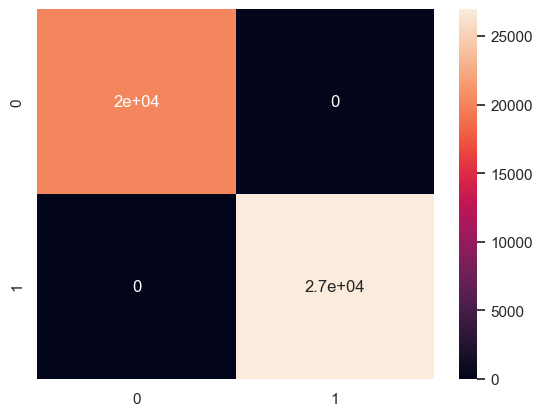

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)